In [1]:
%load_ext autoreload
%autoreload 2

In [74]:
import re
from os.path import join
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

from torchvision.io import read_image

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [8]:
template = "*_test_sample_*_gradcam.png"
results = glob(join("results", template))

In [9]:
len(results), results[9]

(144, 'results/colored_MNIST_test_sample_0_gradcam.png')

In [19]:
def check_dataset(string, datasets):
    for d in datasets:
        if "results/" + d + "_test_sample" in string:
            return True
    return False

In [76]:
# extract results on given dataset only for `Original` and `Counterfactual`

# datasets = ["colored_MNIST", "colored_MNIST_counterfactual"]
# datasets = ["double_colored_MNIST", "double_colored_MNIST_counterfactual"]
datasets = ["wildlife_MNIST", "wildlife_MNIST_counterfactual"]
filtered_results = [x for x in results if check_dataset(x, datasets)]
filtered_results = natsorted(filtered_results)

In [77]:
len(filtered_results)

32

In [78]:
filtered_results[4::(len(filtered_results) // 2)]

['results/wildlife_MNIST_counterfactual_test_sample_4_gradcam.png',
 'results/wildlife_MNIST_test_sample_4_gradcam.png']

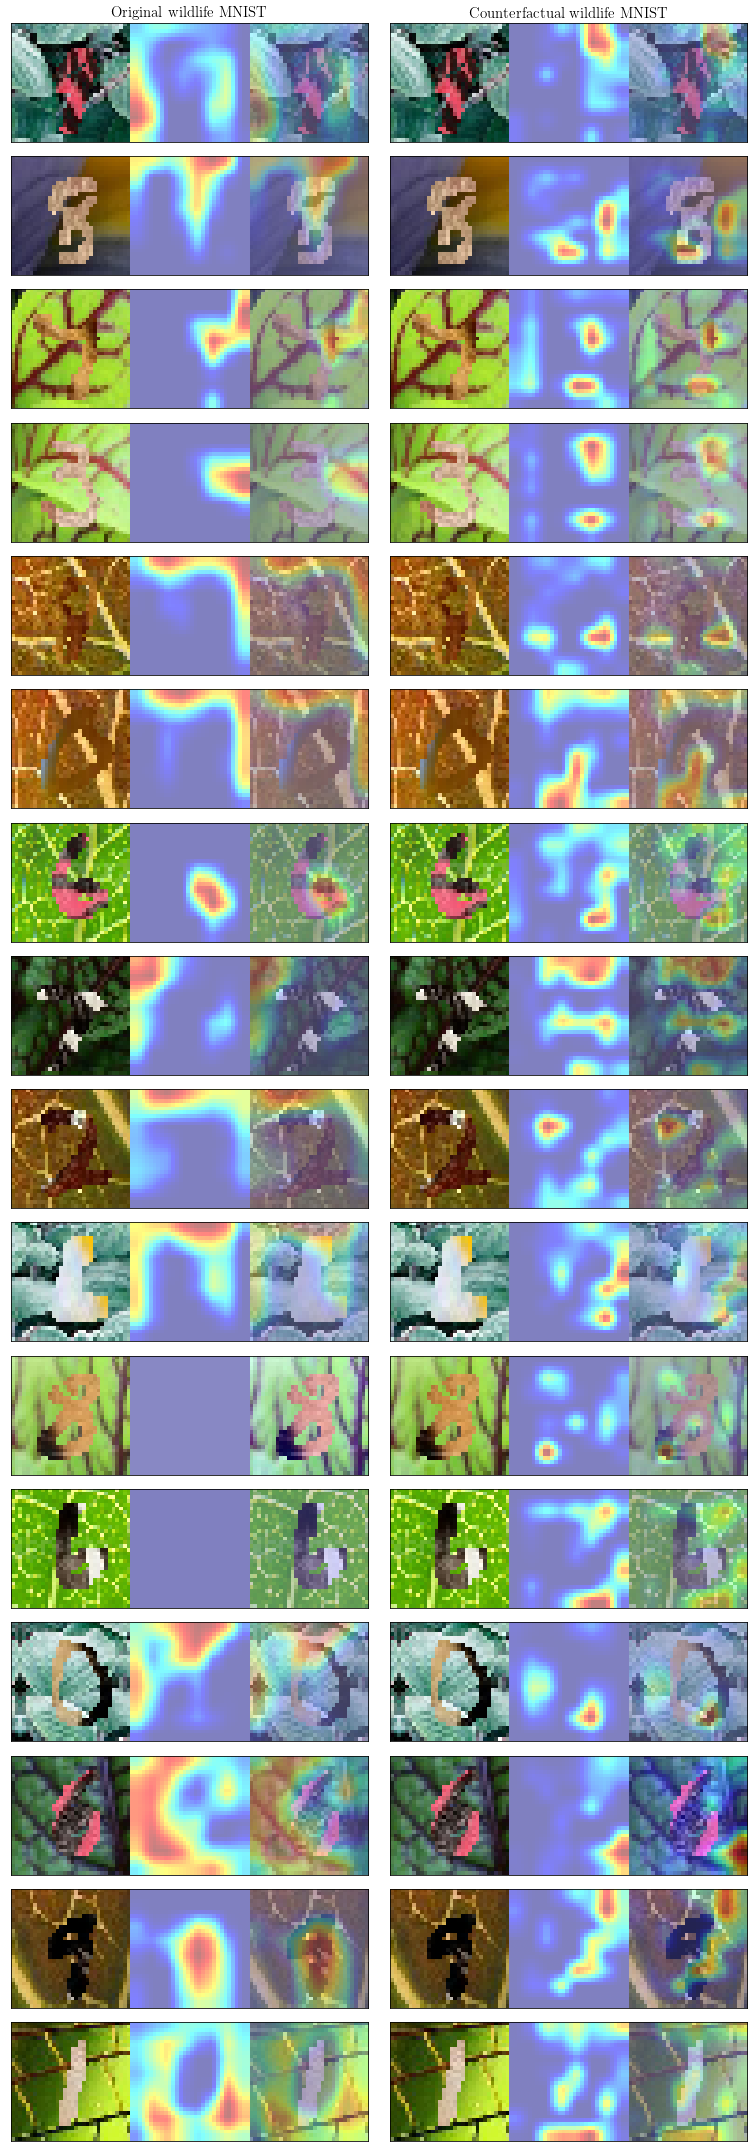

In [80]:
fig, axes = plt.subplots(len(filtered_results) // 2, 2, figsize=(12, 30), tight_layout=True)

for i in range(len(filtered_results) // 2):
    counterfactual, original  = filtered_results[i::(len(filtered_results) // 2)]
    
    if "counterfactual" not in counterfactual:
        original, counterfactual = counterfactual, original

    original = read_image(original).permute((1, 2, 0)).numpy()
    counterfactual = read_image(counterfactual).permute((1, 2, 0)).numpy()
    
    ax = axes[i]
    ax[0].imshow(original)
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].imshow(counterfactual)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    if i == 0:
        dataset = datasets[0].replace("_", " ")
        ax[0].set_title(f"Original {dataset}", fontsize=15)
        ax[1].set_title(f"Counterfactual {dataset}", fontsize=15)

plt.savefig(f"results/{datasets[0]}_samples_gradcam_original_vs_cf.pdf", bbox_inches="tight")
plt.show()